This jupyter notebook helps us to analyse the *quality* of the beads for one experiment.  
We can analyse either one single track or a dictionary of tracks. 

In this jupyter notebook, the *quality* is related to the qualification of the bead defined by the criteria defined in `cleaning`. 

# Import the modules

Loading BokehJS ...


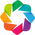

INFO:depixus.:cycles_v4.11.3-13-g95c3a30 for jupyter
INFO:depixus.:Beginners can start by typing: tutorial()


In [1]:
#import scripting
import sys
sys.path.insert(0, "../build")
from scripting import *

# Loading the data

We can load a single track or a dictionary

## Load single track

In [2]:
#Load the track, put the path of the track file
#track = Track("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/AGC_1nM/Test_022_043_AGC_1nM_OR3_20nM_ssHP6_FOV1.trk") #, match=".*_043_(\w\w\w)_.*")
track = Track("../../Documents/local_test_data/AGC_1nM/Test_022_043_AGC_1nM_OR3_20nM_ssHP6_FOV1.trk")

is_dict = False #aux variable for the plot generation

We define a name for `track`

In [3]:
track.key = 'AGC'

## Load dictionary

The names of a TracksDict are determined automatically

In [4]:
#Load the tracks, put the path of the data folder
#We can load .trk or .pk
tracks = TracksDict("../../Documents/local_test_data/ssHP6_Sequencing_20171220//*.pk")

#the chronological order can be extracted from the .trk files
tracks_original = TracksDict("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/*/*.trk", match=".*_043_(\w\w\w)_.*")
order_tracks_chrono = tracks_original.dataframe().set_index('key').sort_values(by='modification').index.values

is_dict = True #aux variable for the plot generation

In [5]:
tracks

{'AGC': <data.track.Track at 0x7f9eed4efcf8>,
 'AGG': <data.track.Track at 0x7f9eed4f5438>,
 'CAG': <data.track.Track at 0x7f9eed4efa58>,
 'CGG': <data.track.Track at 0x7f9eed4f5198>,
 'CGT': <data.track.Track at 0x7f9eed4f5278>,
 'GAG': <data.track.Track at 0x7f9eed4ef6d8>,
 'GCA': <data.track.Track at 0x7f9eed4efb38>,
 'GCG': <data.track.Track at 0x7f9eed4ef978>,
 'GGA': <data.track.Track at 0x7f9eed4ef7b8>,
 'GGC': <data.track.Track at 0x7f9eed4eff98>,
 'GGT': <data.track.Track at 0x7f9eed4f5358>,
 'GTC': <data.track.Track at 0x7f9eed4efc18>,
 'GTG': <data.track.Track at 0x7f9eed4f50b8>,
 'OR3': <data.track.Track at 0x7f9eed4ef898>,
 'TCA': <data.track.Track at 0x7f9eed4efdd8>,
 'TCG': <data.track.Track at 0x7f9eed4ef6a0>,
 'TGA': <data.track.Track at 0x7f9eed4f5518>,
 'TGG': <data.track.Track at 0x7f9eed4efeb8>}

## Resume of good, bad and total number of Beads

We use use the function `resumeTracksQuality` to obtain a summary dataframe for the good, bad and total number of beads for a Track or a TracksDict

In [6]:
#Auxiliary function resumeTracksQuality: outputs a summary of good, bad, and total number of beads
def resumeTracksQuality(tracks,is_dict):
    """
    (DictTracks/Track, bool) -> pandas dataframe
    It receives a DictTracks or Tracks object and a boolean indicating if the input
    is a dictionary and it outputs a dataframe with the summary 
    of good, bad, and total number of beads
    """
    results = list()
    if is_dict:
        for key,val in tracks.items():
            tot = len(list(val.beadsonly.keys()))
            good = len(list(val.cleaning.good()))
            bad = len(list(val.cleaning.bad()))
            results.append({'Track': key,
                    'Total': tot,
                    'Good': good,
                    'Bad': bad})
        results = pd.DataFrame(results,columns=['Track','Good','Bad','Total'])
        results.set_index('Track',inplace=True)
    else:
        results.append({'Track': tracks.key,
                    'Total' : len(list(tracks.beadsonly.keys())),
                    'Good' : len(list(tracks.cleaning.good())),
                    'Bad': len(list(tracks.cleaning.bad())) })
        results = pd.DataFrame(results,columns=['Track','Good','Bad','Total'])
        results.set_index('Track',inplace=True)
    return results

In [7]:
resume_dict = resumeTracksQuality(tracks,True)

In [8]:
resume = resumeTracksQuality(track,False)


# Analysis for a single track

## Distribution of Good/Bad (detailed) Beads

# Analysis for a dictionary of tracks

## Number of Good Beads per Track

We plot a heatmap of good beads per track.

In [9]:
#Function heatmapNumGoodBeads that outputs a seaborn heatmap with the number of good beads per track
def heatmapNumGoodBeads(df_resumeTracksQuality,pc,order = 'chrono'):
    """(pandas dataframe, bool, str) -> Seaborn heatmap
    This function receives a dataframe output by the function 
    resumeTracksQuality a boolean True if we want porcentages and false
    if we want the number of beads and a string representing the order
    of the beads ('chrono' -by default- or 'best_to_worst'). 
    The output is a seaborn heatmap with one column representing 
    the number (or percentage) of good beads and each line representing a track
    """
    
    import seaborn as sns; sns.set()
    total_beads = len(tracks.availablebeads())

    if pc:
        df_resumeTracksQuality[['Good','Bad','Total']] = df_resumeTracksQuality[['Good','Bad','Total']].divide(df_resumeTracksQuality['Total'],axis='index')
        df_resumeTracksQuality[['Good','Bad','Total']] = round(df_resumeTracksQuality[['Good','Bad','Total']]*100,2)

   #order = 'chrono' #'chrono' or 'best_to_worst'
    if order == 'chrono':
        df_resumeTracksQuality = df_resumeTracksQuality.reset_index()
        df_resumeTracksQuality.Track = df_resumeTracksQuality.Track.astype('category')
        df_resumeTracksQuality.Track.cat.set_categories(order_tracks_chrono,inplace=True)
        df_resumeTracksQuality = df_resumeTracksQuality.sort_values(['Track'])
        df_resumeTracksQuality.set_index('Track',inplace=True) 
    elif order == 'best_to_worst':
        df_resumeTracksQuality = df_resumeTracksQuality.sort_values(['Good'],ascending = False)

    ax = sns.heatmap(df_resumeTracksQuality[['Good']],
                     annot = True,
                     fmt = ".1f" if pc else ".0f",
                     cmap = 'BuGn',
                     vmin = 0,
                     vmax = 100 if pc else total_beads,
                     xticklabels = False,
                     annot_kws = {'size':11},
                     square = True,
                     linewidths = 0.5)
    ax.figure.set_size_inches(6,12)
    if pc:
        plt.title('% of Good Beads (Total {:.0f} beads)'.format(total_beads))
    else:
        plt.title('# Good Beads (Total {:.0f} beads)'.format(total_beads))

    plt.ylabel('Tracks ('+['chronological' if order=='chrono' else 'best-to-worst'][0]+' order)')
    return ax


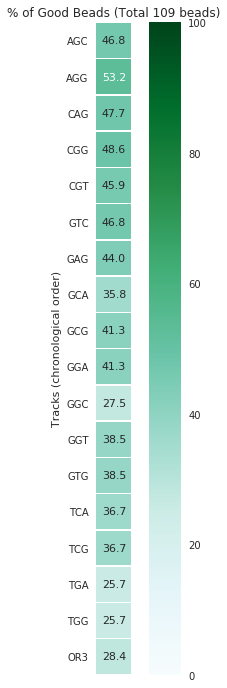

In [10]:
heatmapNumGoodBeads(resume_dict,pc=True,order='chrono')
#pc = True for percentages, False for #
#order = 'chrono' for chronological order of the tracks, 'best_to_worst' to sort by #good beads
plt.show()

## Percentage of Good/Bad (detailed) Beads per Track

We plot a more detailed heatmap considering also the bad beads and their most common error (between the errors defined in the criteria of `cleaning`).

In [11]:
#Auxiliary function resumeBeadsQuality: outputs a dataframe with the # of good beads, and bad beads by their type of error
def resumeBeadsQuality(tracks,is_dict):

# Use the cleaning.messages to get the detail of bad beads

    dfmsg = tracks.cleaning.messages()
    dfmsg = dfmsg.reset_index()

    all_beads = tracks.availablebeads()
#Create a dataframe with rows = key and columns = possible errors. 
#The cells contain the nb of cycles in track that present the corresponding error
#The columns are :  [track extent population hfsigma< hfsigma> saturation]
    dict_msg = {'bead':1,'track':'this','extent<0.5':0,'pop<80%':0,'hfsigma<0.0001':0, 'hfsigma>0.01':0,'sat>90%':0}
    msg = [dict_msg]
#msg = pd.DataFrame(msg)[list(dict_msg.keys())]
#msg

    for bd in all_beads:
  #  print(bd)    
        tmp = dfmsg[dfmsg['bead']==bd]
        for tr in order_tracks_chrono:
      #  print( 0 if tmp[(tmp['key']==tr) & (tmp['message']== '< 0.50' )]['cycles'].empty else tmp[(tmp['key']==tr) & (tmp['message']== '< 0.50' )]['cycles'].values[0] ) 
            dict_aux = {'bead':bd,
                        'track':tr,
                        'extent<0.5':0 if tmp[(tmp['key']==tr) & (tmp['message']== '< 0.50' )]['cycles'].empty else tmp[(tmp['key']==tr) & (tmp['message']== '< 0.50' )]['cycles'].values[0] ,
                        'pop<80%':0 if tmp[(tmp['key']==tr) & (tmp['message']== '< 80%' )]['cycles'].empty else tmp[(tmp['key']==tr) & (tmp['message']== '< 80%' )]['cycles'].values[0] ,
                        'hfsigma<0.0001':0 if tmp[(tmp['key']==tr) & (tmp['message']== '< 0.0001' )]['cycles'].empty else tmp[(tmp['key']==tr) & (tmp['message']== '< 0.0001' )]['cycles'].values[0] ,
                        'hfsigma>0.01':0 if tmp[(tmp['key']==tr) & (tmp['message']== '> 0.0100' )]['cycles'].empty else tmp[(tmp['key']==tr) & (tmp['message']== '> 0.0100' )]['cycles'].values[0] ,
                        'sat>90%':0 if tmp[(tmp['key']==tr) & (tmp['message']== '> 90%' )]['cycles'].empty else tmp[(tmp['key']==tr) & (tmp['message']== '> 90%' )]['cycles'].values[0] }
            msg.append(dict_aux)
       # print(tmp[(tmp['key']==tr) & (tmp['message']== '< 0.50' )]['cycles'].values )
            #tmp[(tmp['key']==tr) and (tmp['message']=='< 0.50'])] ['cycles'])
    del msg[0]
    return pd.DataFrame(msg)[list(dict_msg.keys())]

In [12]:
df_resumeBeadsQuality = resumeBeadsQuality(tracks,True)

In [13]:
#Function heatmapBeadsByType that outputs seaborn heatmap with the number of good beads per track, and bad goods by type of error
def heatmapBeadsByType(df_resume,pc=True,order = 'chrono'):
    import seaborn as sns
    df_discarded_beads = None
    df_discarded_beads = df_resume.copy()
    df_discarded_beads = df_discarded_beads[['bead','track',
                                         'extent<0.5','hfsigma<0.0001',
                                        'hfsigma>0.01','sat>90%','pop<80%']]
    df_discarded_beads = df_discarded_beads.assign(mostCommonError = df_discarded_beads.set_index(['bead','track']).idxmax(axis=1).values)
    df_discarded_beads = df_discarded_beads.assign(mostCommonError = np.where(df_discarded_beads.set_index(['bead','track']).max(axis=1)==0,
                                                                         'noError',
                                                                         df_discarded_beads['mostCommonError']))
    if pc:
        data_discarded = pd.crosstab(df_discarded_beads['track'],
                                     df_discarded_beads['mostCommonError'],
                                     normalize='index')*100
    else:
        data_discarded = pd.crosstab(df_discarded_beads['track'],
                                     df_discarded_beads['mostCommonError'])

    #data_discarded = data_discarded.sort_values(['noError'],ascending=False)
    if order=='chrono':
        data_discarded = data_discarded.loc[order_tracks_chrono]
    elif order == 'best_to_worst':
        data_discarded = data_discarded.sort_values(['noError'],ascending=False)

    fig, ax =plt.subplots(ncols=2)
    fig.set_size_inches(10, 12)
    myfmt = '.1f' if pc else '.0f'
    prefix_title = '%' if pc else '#'
    noError_beads = sns.heatmap(data_discarded[['noError']],
                            annot=True,
                            fmt=myfmt,
                            cmap='Greens',
                            vmin = 0,
                            vmax = 100,
                            linewidths=0.5,
                            ax=ax[0],
                            square=True)
    noError_beads.set_yticklabels(noError_beads.get_yticklabels(),rotation=0)
    noError_beads.set_xticklabels(noError_beads.get_xticklabels(),rotation=30)
    total_beads = len(tracks.availablebeads())
    ax[0].set_title(prefix_title+' of Beads with no Errors (Total {:.0f} beads)'.format(total_beads))
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Tracks ('+['chronological' if order=='chrono' else 'best-to-worst'][0]+' order)')
    data_discarded.pop('noError')
    error_beads = sns.heatmap(data_discarded,
                          annot=True,
                          fmt=myfmt,
                          vmin = 0,
                          vmax = 100,
                          cmap='Reds',
                          linewidths=0.5,
                          ax=ax[1])
    error_beads.set_xticklabels(error_beads.get_xticklabels(),rotation=30)
    error_beads.set_yticklabels(error_beads.get_yticklabels(),rotation=0)

    ax[1].set_title(prefix_title+' of Beads by most common error (Total {:.0f} beads)'.format(total_beads))
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Tracks ('+['chronological' if order=='chrono' else 'best-to-worst'][0]+' order)')
    plt.tight_layout()
    return ax


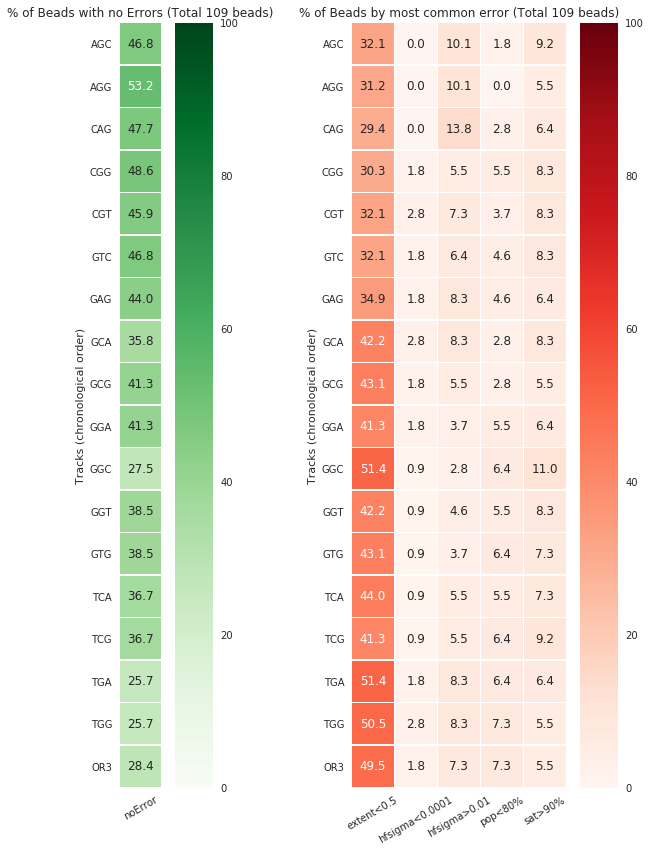

In [14]:
heatmapBeadsByType(df_resumeBeadsQuality,pc=True,order='chrono') #pc = True for percentages, False for # // order = 'chrono' or 'best_to_worst'
plt.show()

## Distribution of Good/Beads per Track

We plot a matrix of beads and tracks. Each cell $(i,j)$ is a dychotomous variable: $1$ if the bead $i$ is good in track $j$ and $0$ if the bead is considered bad in track $j$. The plot present the good beads in green and the bad beads in red.

In [15]:
#Auxiliary function dfGoodBadBeads: outputs a dataframe with of 0's and 1's. The columns are the tracks, rows the beads
def dfGoodBadBeads(tracks):
    """
    (DictTracks,list) -> pandas dataframe
    It receives a DictTRacks object and a list of the order of tracks and
    it outputs a dataframe with the 'state' of the bead. The cell
    [bd,trk] is 0 if the bead bd is bad in track trk. The value of the cell is 1 if the bead is good.
    """

    df_good_bad = {}
    all_beads = tracks.availablebeads()

    df_good_bad['bead'] = all_beads
    for trk,val in tracks.items():
        clean_beads = val.cleaning.good()
        df_good_bad[trk] = list(map(lambda x: x in clean_beads and 1 or 0,all_beads))
    df_good_bad = pd.DataFrame(df_good_bad)
    #order by the best beads. A bead is better than another if it is 'good' in more tracks
    tmp = df_good_bad.loc[:, df_good_bad.columns != 'bead']
    idx = tmp.sum(axis=1).sort_values(ascending=True).index #order by sum of good beads by track
    cols = df_good_bad.loc[idx].sum().sort_values(ascending=False).index #order by sum of good tracks per bead
    df_good_bad = df_good_bad.loc[idx]
    df_good_bad = df_good_bad[cols]
    return df_good_bad

In [52]:
df_dfGoodBadBeads = dfGoodBadBeads(tracks)
order_beads = df_dfGoodBadBeads['bead'].values
order_tracks_best = np.array(df_dfGoodBadBeads.set_index('bead').columns)

In [53]:
#Function heatmapGoodBad that outputs bokeh heatmap with the status the beads per track (Good or Bad beads)
def heatmapGoodBad(data,order = 'chrono'):
    from math import pi
    import pandas as pd

    from bokeh.io import show
    from bokeh.models import (
        ColumnDataSource,
        HoverTool,
        LinearColorMapper,
        BasicTicker,
        PrintfTickFormatter,
        ColorBar,
    )
    from bokeh.plotting import figure
    
    data['bead'] = data['bead'].astype(str)
    data = data.set_index('bead')
    data.columns.name = 'track'
    data=data.transpose()

    plotbeads = list(data.columns)
    if order=='chrono':
        plottracks = order_tracks_chrono #list(data.index) #this is order_tracks_chrono if we used that as the order before, otherwise it is best to worst
    elif order == 'best_to_worst':
        plottracks = list(data.index)
        
    # reshape to 1D array 
    df = pd.DataFrame(data.stack(), columns=['quality']).reset_index()
    
    # colormap
    colors = [ "#8B0000","#006400"] #[ "#550b1d","#75968f"] #
    mapper = LinearColorMapper(palette=colors, low=df.quality.min(), high=df.quality.max())
    source = ColumnDataSource(df)

    TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

    p = figure(title="Beads Status for each track",
           x_range=plottracks, y_range=plotbeads,
           x_axis_location="above", plot_width=1000, plot_height=1500,
           tools=TOOLS, toolbar_location='below')
    
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "10pt"
    p.axis.major_label_standoff = 5
    p.axis.axis_label_standoff = 10
    p.xaxis.major_label_orientation = pi / 3

    p.rect(x="track", y="bead", width=1, height=1,
       source=source,
       fill_color={'field': 'quality', 'transform': mapper},
       line_color=None)
    
    color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="9pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%s"),
                     label_standoff=10, border_line_color=None, location=(1, 0),
                     major_label_overrides={0:'Bad Beads',0.5:'',1:'Good Beads'},
                    major_tick_out=20)
    
    p.add_layout(color_bar, 'right')

    p.select_one(HoverTool).tooltips = [
     ('Bead/Track', '@bead @track'),
     ('Status', '@quality'),
    ]
    return p

In [54]:
p = heatmapGoodBad(df_dfGoodBadBeads,order = 'chrono')
from bokeh.io import show
show(p)

## Distribution of Good/Beads (detailed)  per Track

We plot the previous matrix with more detail, using the information of the most common error per bead. Each cell is a nominal variable:
* $0$ if the bead is good
* $1$ if the bead's most common error is `extent < 0.5`
* $2$ if the bead's most common error is `hfsigma < 0.0001`
* $3$ if the bead's most common error is `hfsigma > 0.01`
* $4$ if the bead's most common error is `pop < 80%`
* $5$ if the bead's most common error is `sat > 90%`


In [50]:
#Function heatmapGoodBadDetailed that outputs bokeh heatmap with the status the beads per track, bad beads by most Common Error
def heatmapGoodBadDetailed(df_state_beads,order_beads = order_beads, order = 'chrono'):
    from math import pi
    import pandas as pd

    #from bokeh.io import show
    from bokeh.models import (
        ColumnDataSource,
        HoverTool,
        LinearColorMapper,
        BasicTicker,
        PrintfTickFormatter,
        ColorBar,
    )
    from bokeh.plotting import figure, show

    df_state_beads = df_state_beads.assign(mostCommonError =df_state_beads.set_index(['bead','track']).idxmax(axis=1).values)
    df_state_beads = df_state_beads.assign(mostCommonError = np.where(df_state_beads.set_index(['bead','track']).max(axis=1)==0,
                                                                         'noError',
                                                                         df_state_beads['mostCommonError']))
    df_state_beads = df_state_beads[['bead','track', 'mostCommonError']]
    
    plotbeads = order_beads # df_state_beads['bead'].unique()
    plottracks = order_tracks_chrono if order=='chrono' else order_tracks_best
    aux = pd.DataFrame('', index=plottracks, columns=plotbeads)

    for bd in plotbeads:
        for trk in plottracks:
            aux.loc[trk][bd] = df_state_beads[(df_state_beads['bead']==bd) & (df_state_beads['track']==trk)].mostCommonError.values[0]
    
    # reshape to 1D array 
    df = pd.DataFrame(aux.stack(), columns=['typeError']).reset_index()

    df['typeError'] = np.where(df['typeError']=='noError',int(0),df['typeError'])
    df['typeError'] = np.where(df['typeError']=='extent<0.5',int(1),df['typeError'])
    df['typeError'] = np.where(df['typeError']=='hfsigma<0.0001',int(2),df['typeError'])
    df['typeError'] = np.where(df['typeError']=='hfsigma>0.01',int(3),df['typeError'])
    df['typeError'] = np.where(df['typeError']=='pop<80%',int(4),df['typeError'])
    df['typeError'] = np.where(df['typeError']=='sat>90%',int(5),df['typeError'])

    df.columns = ['track','bead','typeError']
    df['typeError'] = df['typeError'].apply(pd.to_numeric,errors='coerce') 
    #print(df)
    
    # colormap
    colors = [ "#006400","#B22222","#8B008B","#C71585", "#FF4500","#FF7F50"] #

    mapper = LinearColorMapper(palette=colors, low=df.typeError.min(), high=df.typeError.max())

    #source = ColumnDataSource(df)
    source=df
    df['bead'] = df['bead'].astype(str)
    
    TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
    
    plotbeads = plotbeads.astype(str) #change to string for the figure
    
    
    p = figure(plot_width=1000, plot_height=1500,title="Beads Status by Most Common Error",
                   x_range=plottracks, y_range=plotbeads,
                   x_axis_location="above",
                   tools=TOOLS, toolbar_location='below')
    
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "10pt"
    p.axis.major_label_standoff = 5
    p.axis.axis_label_standoff = 10
    p.xaxis.major_label_orientation = pi / 3
    
    
    p.rect(x="track", y="bead", width=1, height=1, source=df,
                   fill_color={'field': 'typeError', 'transform': mapper},
                   line_color=None)
    

    color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="9pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%s"),
                     label_standoff=10, border_line_color=None, location=(1, 0),
                     major_label_overrides={0:'noError',
                                            1:'extent<0.5',
                                            2:'hfsigma<0.0001',
                                            3:'hfsigma>0.01',
                                            4:'pop<80%',
                                            5:'sat<90%'}, major_tick_out=20)
    p.add_layout(color_bar, 'right')

    p.select_one(HoverTool).tooltips = [
     ('Bead/Track', '@bead @track'),
     ('Type of Error', '@typeError'),
    ]
    return p

In [51]:
plot = heatmapGoodBadDetailed(df_resumeBeadsQuality,order = 'chrono')
show(plot)

## Flow diagram of Beads from first to last Track

We plot a flow diagram between two tracks. By default, we take the first and last track to observe the proportion of beads that changed from status `good` to error by `extent`. We can also specify the first and last track to see the flow between them.

In [86]:
#Auxiliary function dfTypeError: outputs a dataframe columns are the tracks rows the beads
#Each cell contains the status of the bead: noError, extent>0.5,...
def dfTypeError(df_state_beads,orderbeads,ordertracks):
    df_state_beads = df_state_beads.assign(mostCommonError =df_state_beads.set_index(['bead','track']).idxmax(axis=1).values)
    df_state_beads = df_state_beads.assign(mostCommonError = np.where(df_state_beads.set_index(['bead','track']).max(axis=1)==0,
                                                                         'noError',
                                                                         df_state_beads['mostCommonError']))
    df_state_beads = df_state_beads[['bead','track', 'mostCommonError']]
    
    aux = pd.DataFrame('', index=orderbeads, columns=ordertracks)
    for bd in df_state_beads['bead'].unique():
        for trk in df_state_beads['track'].unique():
            aux.loc[bd][trk] = df_state_beads[(df_state_beads['bead']==bd) & (df_state_beads['track']==trk)].mostCommonError.values[0]
    
    return aux

In [90]:
df_typeError = dfTypeError(df_resumeBeadsQuality,order_beads,order_tracks_chrono)

In [91]:
#Function flowBeads that outputs a flow diagram between two tracks showing the proportion
#of the beads classified by their status (their mostCommonError)
def flowBeads(df_sankey,first_track = None,last_track=None):
    import sankey
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    pd.options.display.max_rows=8
    %matplotlib inline

    #https://github.com/anazalea/pySankey
    #test_sankey = aux.set_index('index')
    if first_track==None:
        first_track = df_sankey.columns[0]
    if last_track==None:
        last_track = df_sankey.columns[-1]
        
    df_sankey = df_sankey[[first_track, last_track]]

    #colors3 = [ "#006400","#B22222","#8B008B","#C71585", "#FF4500","#FF7F50"] #

    colorDict =  {'noError':'#006400','extent<0.5':'#B22222','hfsigma<0.0001':'#8B008B','hfsigma>0.01':'#C71585','sat>90%':'#FF4500', 'pop<80%':'#FF7F50'  }

    df_sankey.reset_index()
    df_sankey = df_sankey.reset_index()[[first_track,last_track]]
    df_sankey
    sankey.sankey(df_sankey[first_track],df_sankey[last_track],
              aspect=20,
              colorDict=colorDict,
              fontsize=12,
              leftLabels=['pop<80%','sat>90%', 'hfsigma>0.01', 'hfsigma<0.0001', 'extent<0.5', 'noError'],
              rightLabels=['pop<80%','sat>90%', 'hfsigma>0.01', 'hfsigma<0.0001', 'extent<0.5', 'noError'])
    plt.gcf().set_size_inches(12,12)
    plt.title('Track '+first_track+ ' ----> Track '+last_track)
    #plt.savefig('sankey.png',bbox_inches='tight',dpi=150)
    return plt


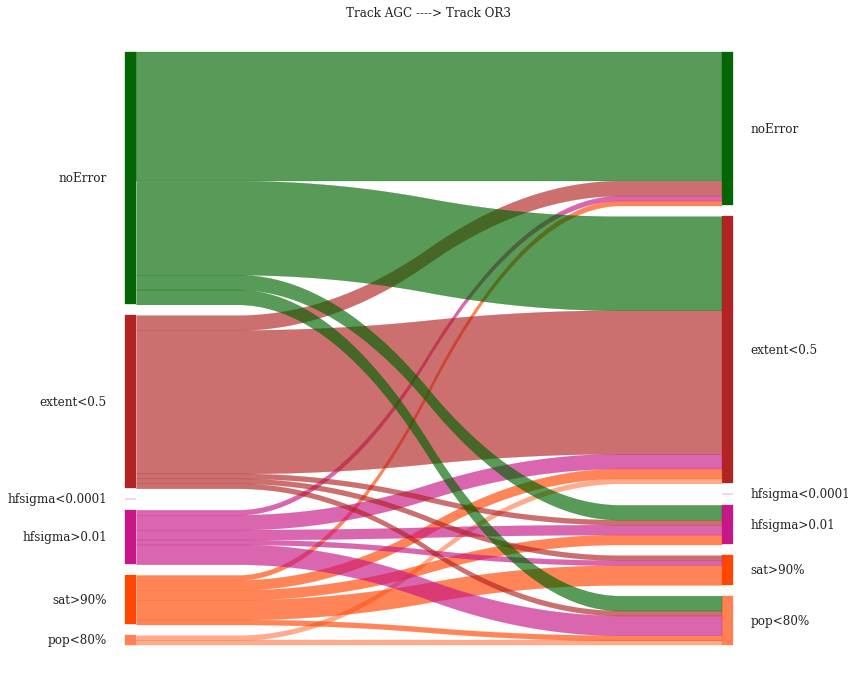

In [93]:
flow_diagram = flowBeads(df_typeError,first_track=None, last_track=None)
flow_diagram.show()

## Barplot per Bead of Nb of Errors for each track

We plot one bar chart per bead, where each column represents the number of errors (divided by type of error) registered for that bead in the corresponding track. 

In [101]:
#Function barBeads that outputs a bar chart per bead, with columns tracks where the
#y-axis represents the number of errors (per type of error) for that bead 
#in the specific track
def barBeads(df_dfGoodBadBeads,ordertracks,orderbeads):
    %%opts Bars.Stacked [stack_index='typeOfError'  ] 
    %%opts Bars.Stacked (color=Cycle(values=["#B22222","#8B008B","#C71585", "#FF4500","#FF7F50"]))
    #title_format="tt"+badbead]
    ### HOLOVIEWS STACKED BAR ###
    # http://holoviews.org/reference/elements/bokeh/Bars.html

    data_pc = df_dfGoodBadBeads.copy()
    data_pc = data_pc.set_index('bead')
    goodpc = data_pc.astype('float').sum(axis=1)
    goodpc = goodpc.astype('int')
    N = len(ordertracks)

    def holo_bars(bead):
        #HERE I HAVE TO CHANGE THIS GLOBAL VARIABLE to the head of the function
        global dfmsg_reset
        copy = dfmsg_reset
        copy = copy[copy['bead']==bead]
        copy = copy[['track','typeOfError','NbErrors']] # ,'types','bead'
        copy = copy.sort_values(['track','typeOfError'])
        mytitle='Bad bead in '+str(N-goodpc.loc[bead])+' out of '+str(N)+' tracks // '
        barplot = hv.Bars(copy,  ['track','typeOfError'], ['NbErrors'],group='Stacked',label=mytitle).redim.range(NbErrors=(0, 600))
        axes_opts = {'xrotation': 45}
        return barplot.opts(plot=axes_opts)#*hv.Text(0, 400, 'Quadratic Curve')
        #return barplot

    #to sort from best to worst track
    #dfmsg_reset.track = dfmsg_reset.track.astype("category")
    #dfmsg_reset.track = dfmsg_reset.track.cat.set_categories(plottracks,ordered=True)
    #dfmsg_reset.sort_values(by='track',inplace=True) 

    dmap = hv.DynamicMap(holo_bars, kdims=['bead'])

    mybeads = [float(i) for i in orderbeads]
    dmap.redim.values(bead = mybeads) #sorted by badfirst
    # dmap.redim.values(badbead = sorted(tracks.availablebeads())) #normal sort
    

In [104]:
hvbar = barBeads(df_dfGoodBadBeads,order_tracks_chrono,order_beads)
hvbar